## Disha Balpande

# Task 3 Exploratory Data Analysis - Retail

<b>Task Explanation</b>
<br>Perform <b>‘Exploratory Data Analysis’</b> on dataset <b>‘SampleSuperstore’</b>.As a business manager, try to find out the weak areas where you can work to make more profit.
<br>What all business problems you can derive by exploring the data?

### 1. Loading Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotnine import *


### 2. Import Data

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 3. Data Inspection

In [4]:
 df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#Final Shape of the dataframe
df_Shape = df.shape
df_Shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#Deleting the variable
col=['Postal Code']
df1=df.drop(columns=col,axis=1)
df1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#Correlation between variable
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


### 4. Data Cleaning

In [10]:
#Deleting Identicle rows to reduce noise from the data
df1.drop_duplicates(keep= 'first',inplace=True)
df1

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
#Final Shape of the dataframe
Final_Shape = df1.shape
Final_Shape

(9944, 12)

### 5. Exploratory Data Analysis and Visulization

<b>What are total Sales and Profits of the company?

In [12]:
Sales_and_Profit = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profit,2)

Sales     2297200.86
Profit     286397.02
dtype: float64

 <b> Total Sales = 2297200.86 USD <br>
 <b> Total Profits = 286397.02 USD

<b>  Top 10 States by Sales and Profits

In [13]:
Top_10_Sales = df.groupby('State').Sales.sum().nlargest(n=10)
Top_10_Sales

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

In [14]:
Top_10_Profits = df.groupby('State').Profit.sum().nlargest(n=10)
Top_10_Profits

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

In [15]:
Top_10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [16]:
Top_10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

### 6.Data  Visulization

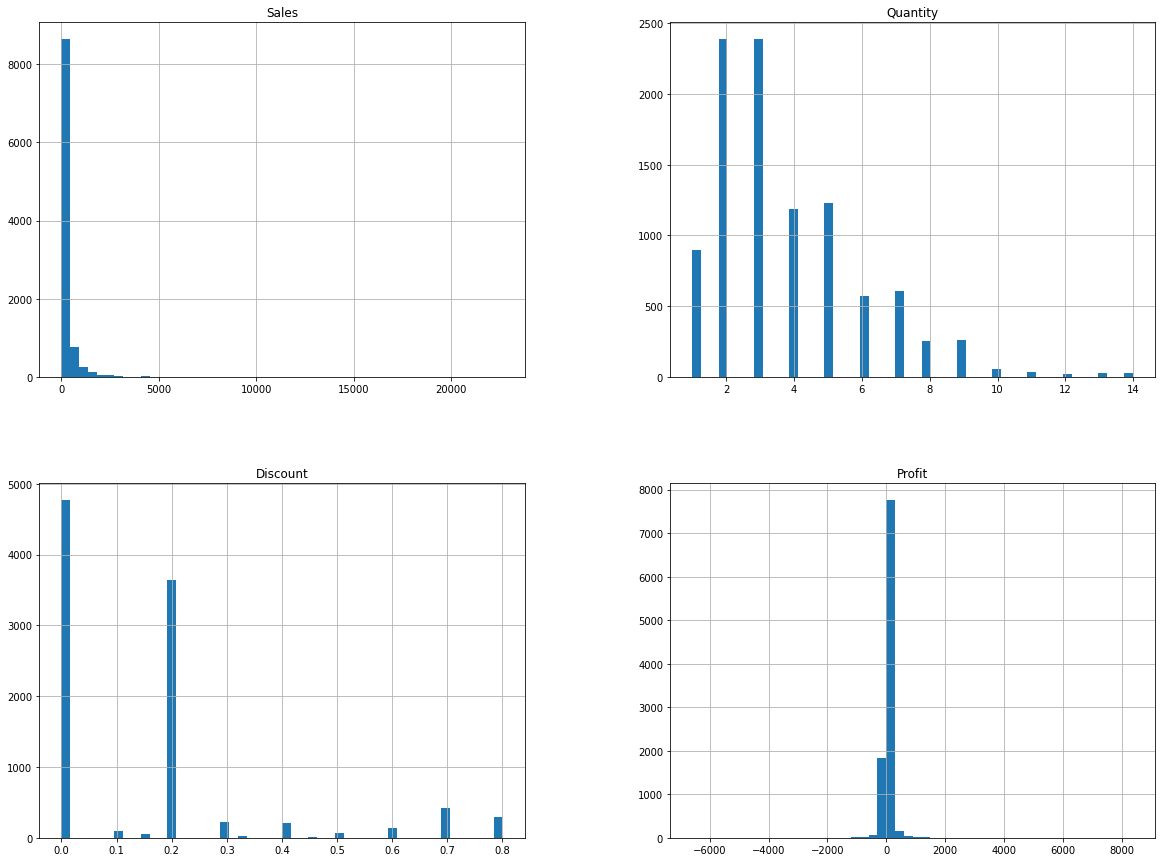

In [17]:
df1.hist(bins=50,figsize=(20,15))
plt.show()

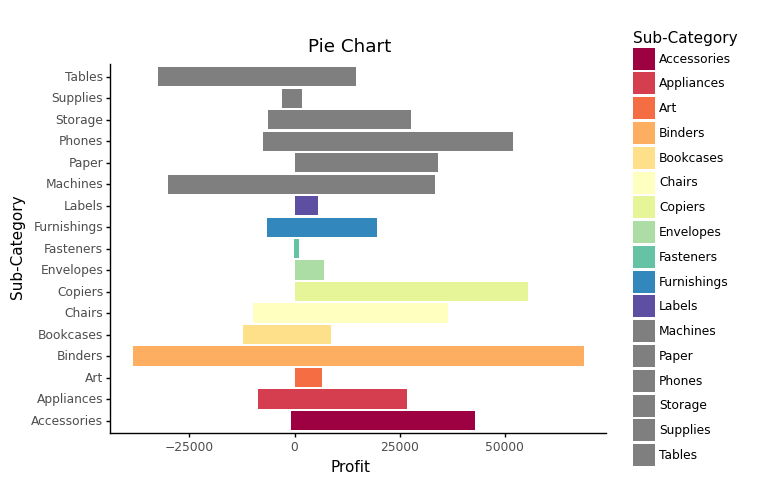

<ggplot: (8764600071759)>

In [18]:
Profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)
                      

Above Pie chart Shows the profit and loss of each and every sub-categories.Here from graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories. <br>
<br>"Copiers" Sub-category has gain highest amount of profit with no loss.There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.<br>
<br>Next,Suffering from highest loss is machines.

Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

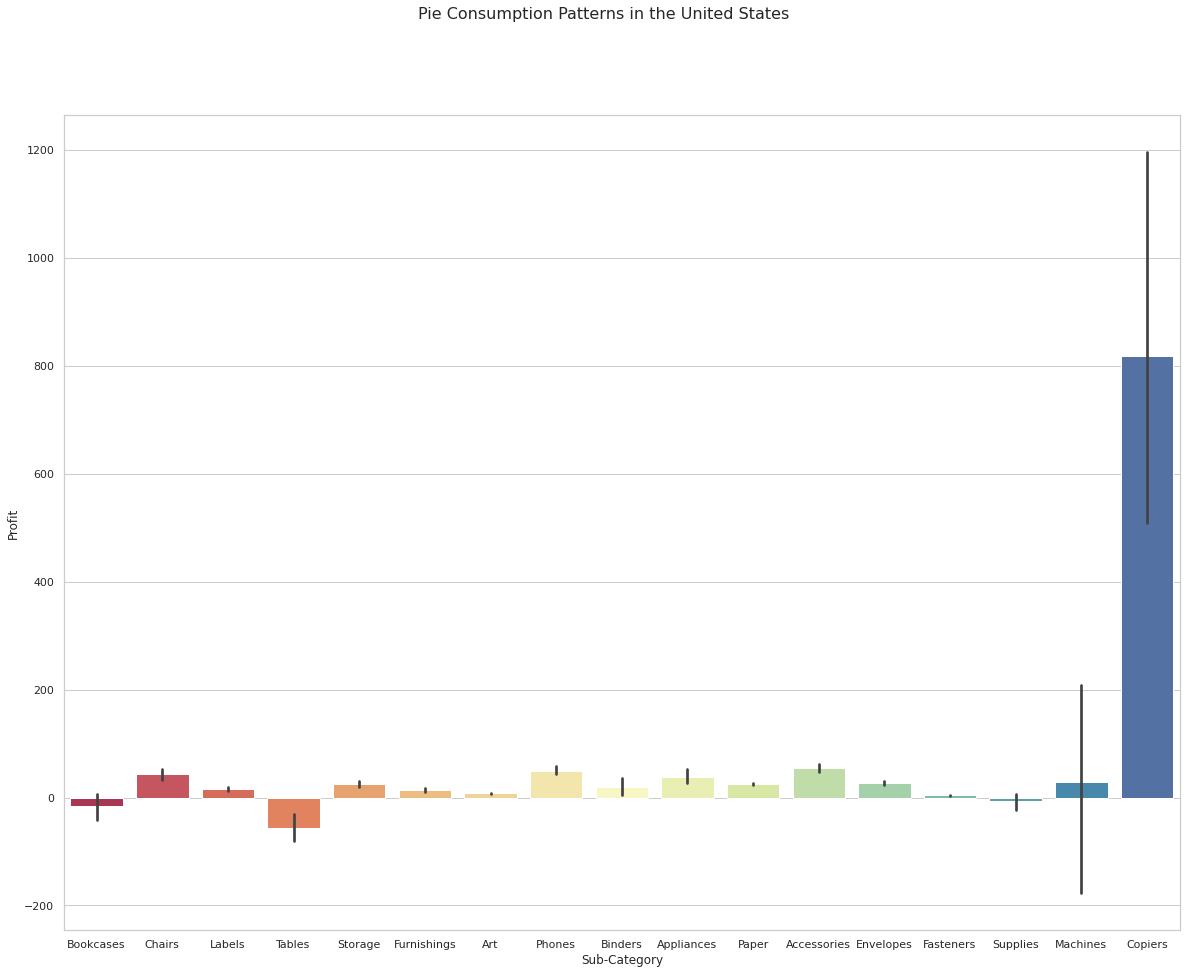

In [19]:
sns.set(style='whitegrid')
plt.figure(2,figsize=(20,15))
sns.barplot(x='Sub-Category', y='Profit',data=df,palette='Spectral')
plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

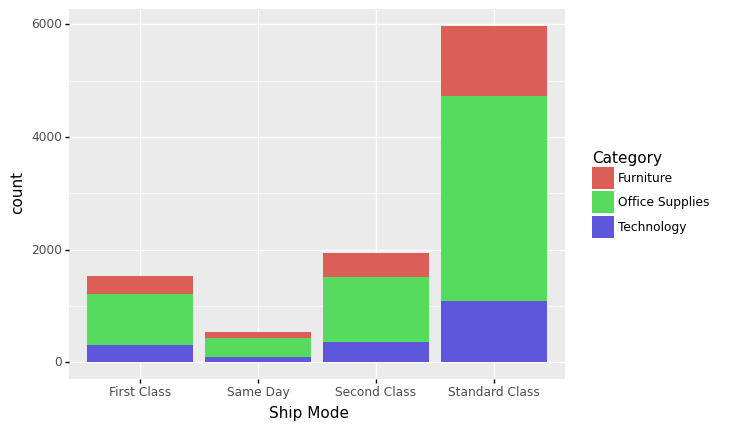

<ggplot: (8764598925379)>

In [20]:
ggplot(df,aes(x='Ship Mode',fill='Category')) + geom_bar(stat = 'count')

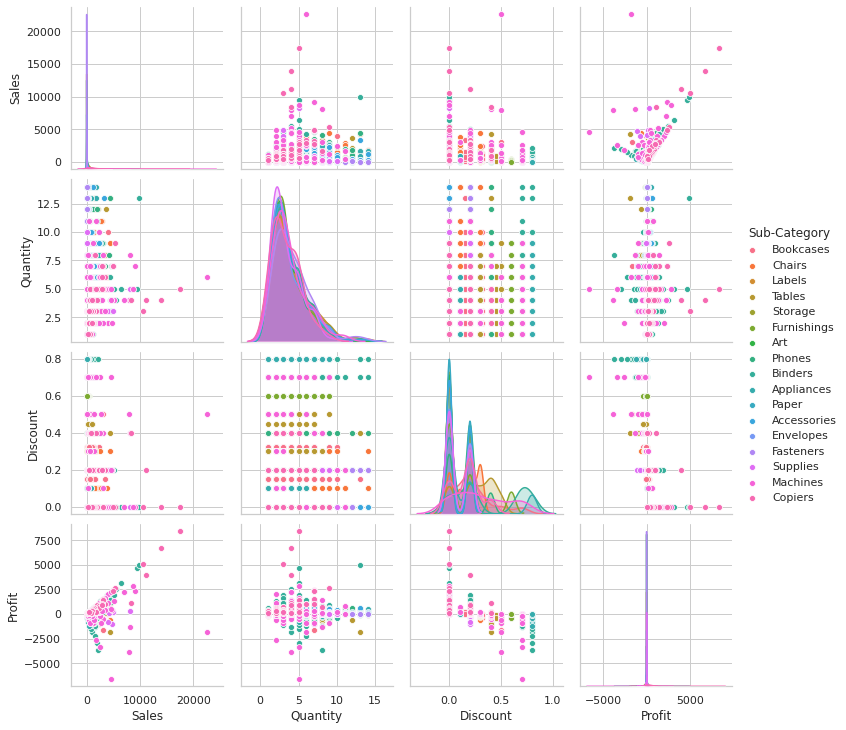

In [21]:
figsize=(15,10)
sns.pairplot(df1,hue="Sub-Category")

From the above plot we can say that Our Data is not Normal and it has some amount of outliers too.<br>
<br> Explore more about these outliers by using boxplots.<br>
<br>we'll check Sales from Every Segments of Whole Data.

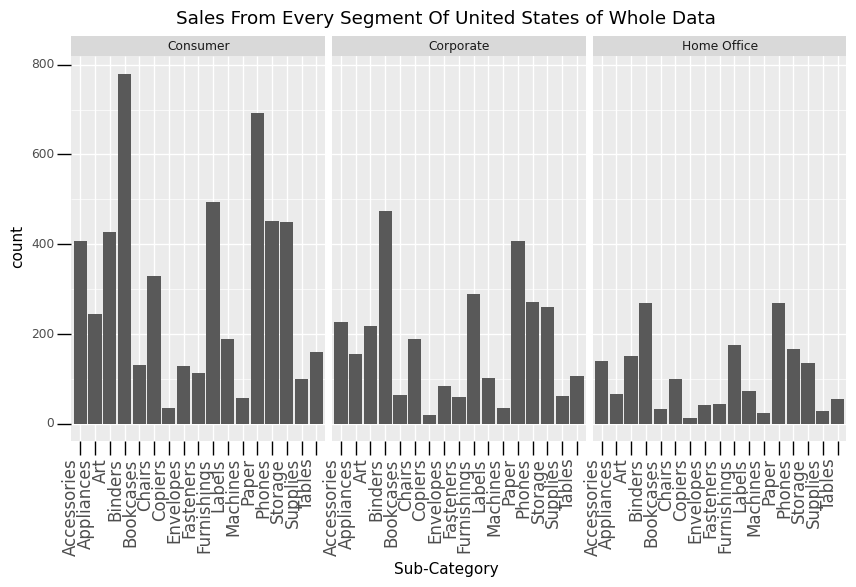

<ggplot: (8764596230072)>

In [25]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that "Tables","Supplies","Machines","Copiers","Bookcases" has the lowest Sales. 
"Consumer" has purchased more sub-categories as compared to other segments.

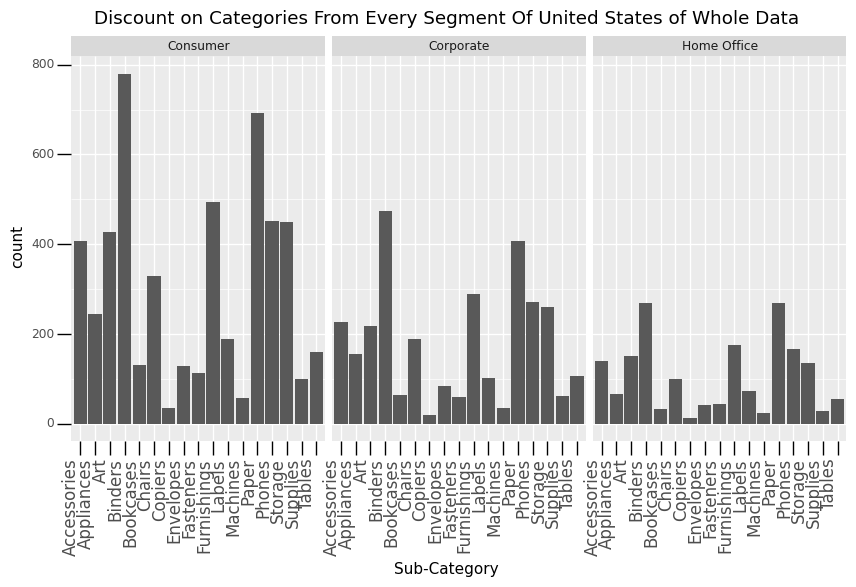

<ggplot: (8764599451661)>

In [27]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

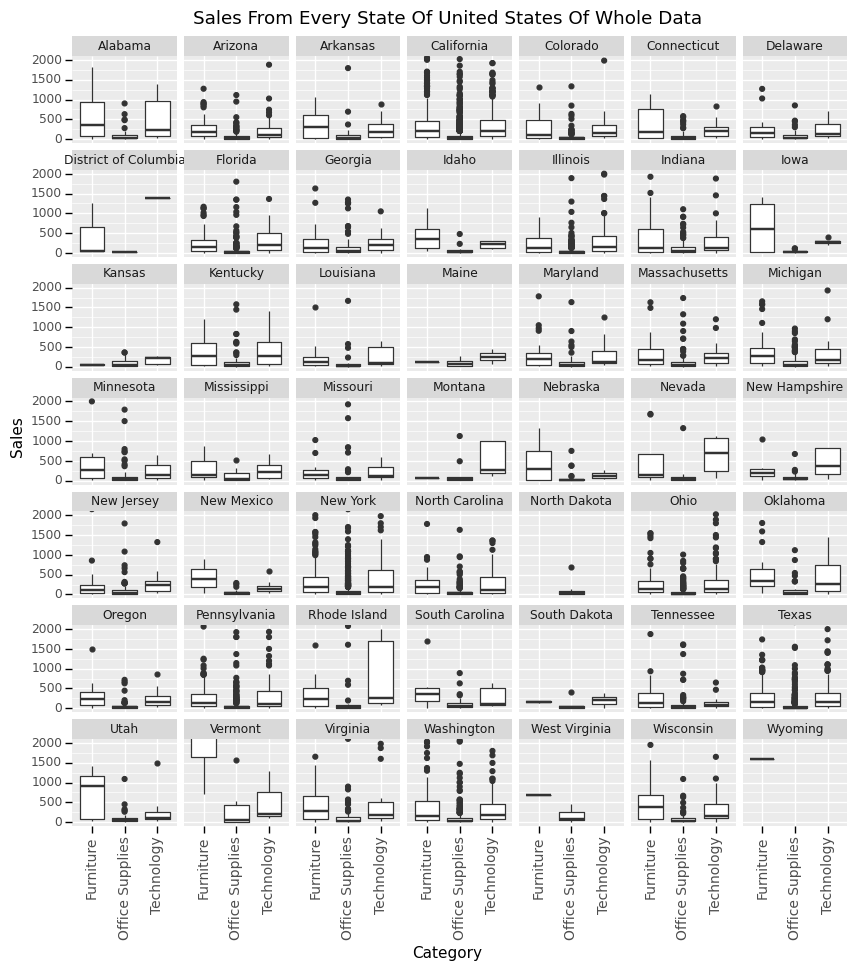

<ggplot: (8764598864788)>

In [28]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,
                     axis_ticks_length_minor=5)
(ggplot(df, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels + coord_cartesian(ylim = (0, 2000))+ggtitle("Sales From Every State Of United States Of Whole Data"))

In Above Box plot graph I have taken y-axis range from (0,2000) so that we can properly visualize that in which common price range sales happened and what is the price range of categories in different Cities and if the sales are high or low in different states of United States.<br>
<br> Here outlier means that price of some categories in different states has different higher prices. The sales was upto 20,000 but i have taken here small range so that vidualize clearly about each states.<br>
<br> Let's See about the profit in every states

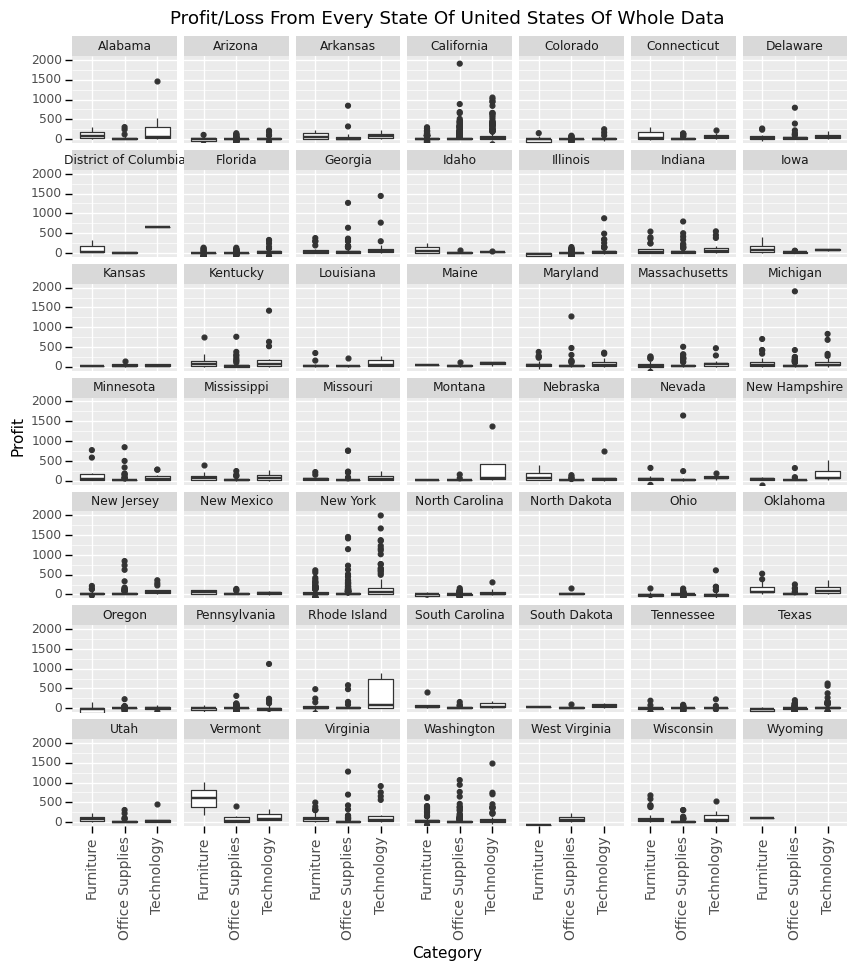

<ggplot: (8764589521924)>

In [29]:
 flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,
                     axis_ticks_length_minor=5)
(ggplot(df, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels + coord_cartesian(ylim = (0, 2000))+ggtitle("Profit/Loss From Every State Of United States Of Whole Data"))

From above graph we can see that in which states in which category company/organization has Profit and loss,highest loss is happend in "texas" states in "office suplies" category.<br>
<br> There states who neither come in profit nor comes in loss range they are neutral ,states like "South Dakota","West Virginia","Wyoming","Maine",etc.<br>
<br> There are also some states who has no problem of loss,only profit has gained ,states like "Virginia","Washington","New York","California",etc.

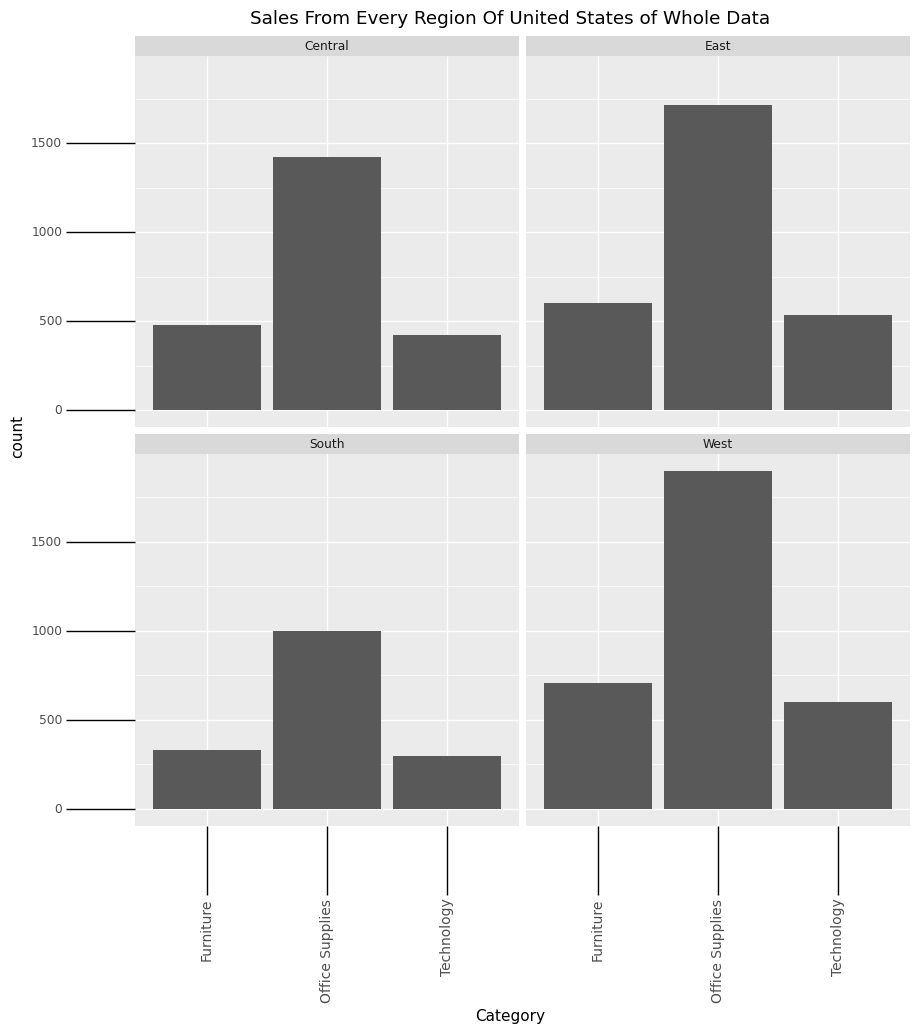

<ggplot: (8764599022969)>

In [30]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(df, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

The above Graph Shows the sales of categories in different Region of United States.From the Above Graph we can see that Sales of "Office supplies" are high in every Region compared to other Categories."Technology" and "Furniture" has very less sale in South Region compared to other regions of US.However,sales of "Technology" and "Furniture" are less in other Regions too.

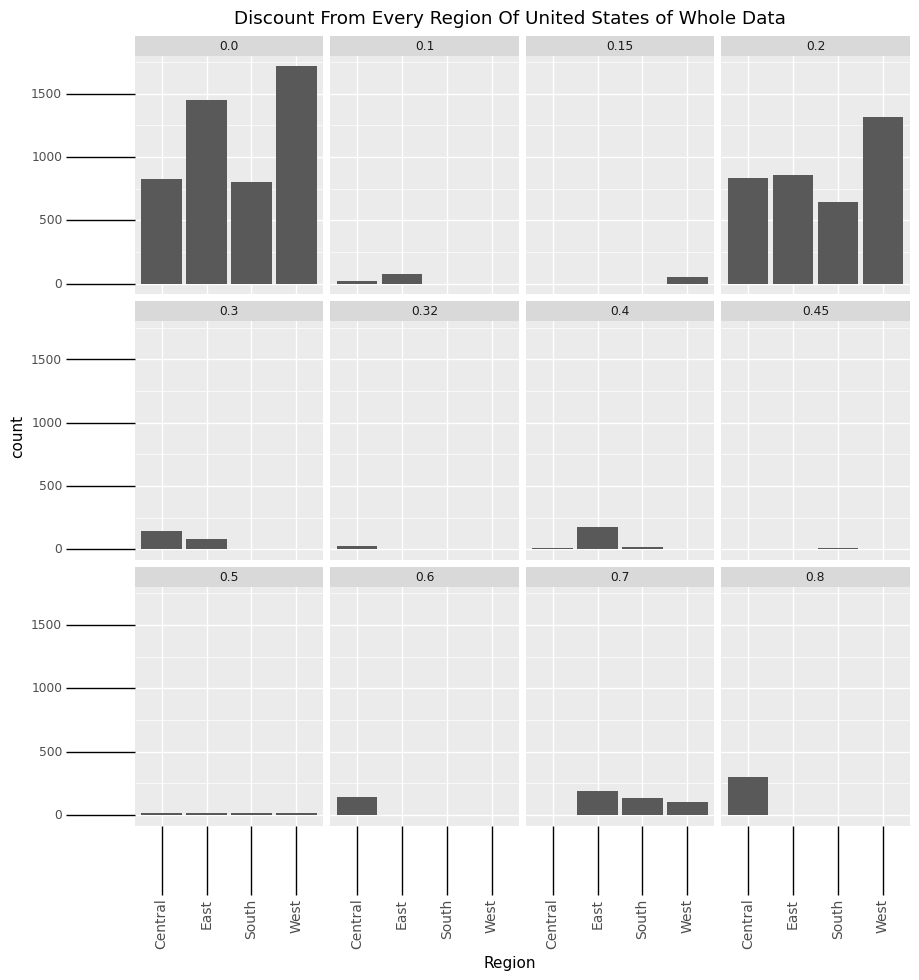

<ggplot: (8764589522167)>

In [31]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(df, aes(x='Region', fill='Quantity')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Discount']) + flip_xlabels+ ggtitle("Discount From Every Region Of United States of Whole Data"))

From the above Graph we can say that there were no discount on Higher number of quantity purchased on any region of US(may be their selling Price would be low). 0.0 Discount were given on Higher number of quantity purchased on any region of US.

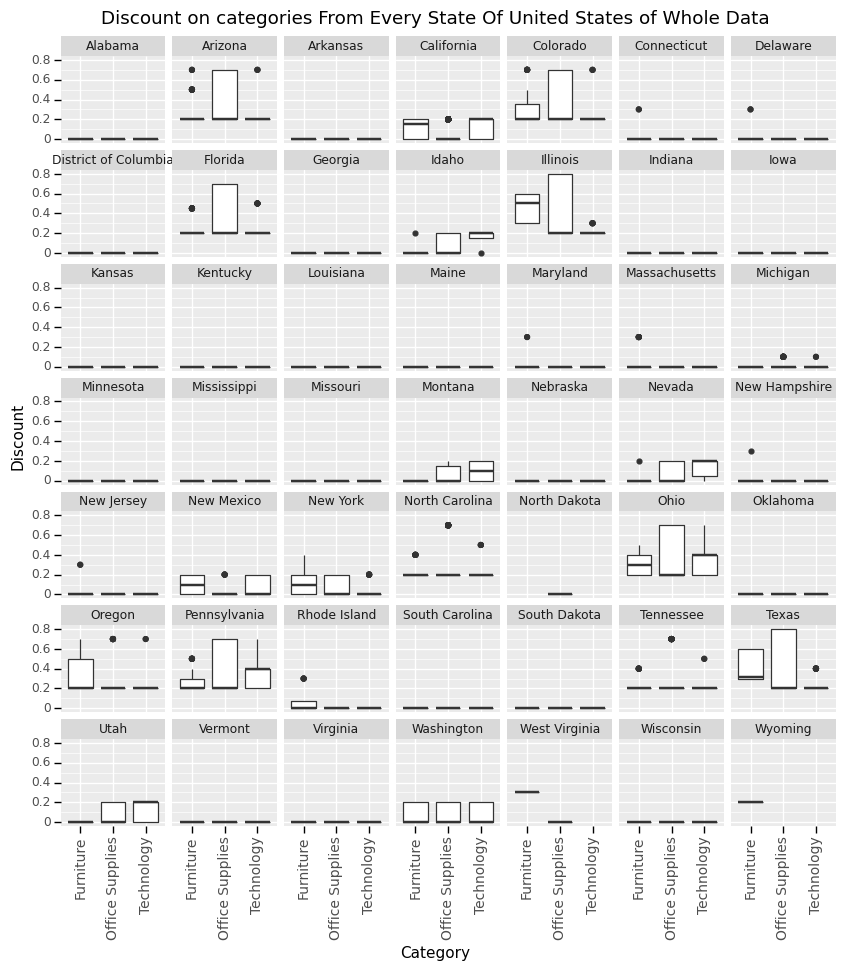

<ggplot: (8764599495141)>

In [32]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States of Whole Data"))


From the above Graph we can say that the most discount on categories is given some states i.e. "Texas","Oregon","Pennsylvania","Washinfton","Ohio","Newyork","Mexico","Utah" etc. there are also some states where no discounts were there on Categories like "Vermont","Virginia","Washington","West Virgenia" etc.

So Now we Grouped or sum the sales ,profit,discount,quantity according to every state of region and also according to sub-categories sales.

In [33]:
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


In [34]:
### sum,mean,min,max,count median,standard deviation,Variance of each states of Profit
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


From above Summary we can say that highest profit or loss sales has been done from which States,what is the varient profit is it high or low.What is the median Profit ,what is the Mean profit ,actually Mean will Give an Unbiased Result Compared to median Because Mean considered whole data in Calculation while Median is not.

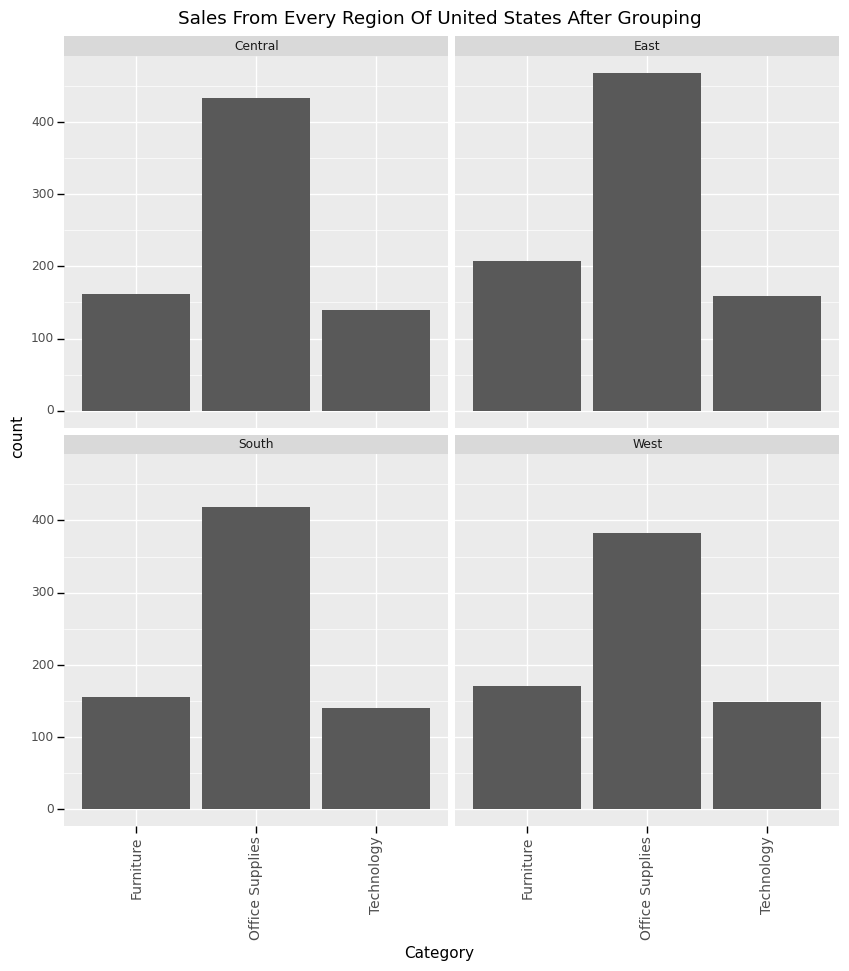

<ggplot: (8764596225299)>

In [35]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
 + facet_wrap(['Region']) + flip_xlabels+ggtitle("Sales From Every Region Of United States After Grouping"))

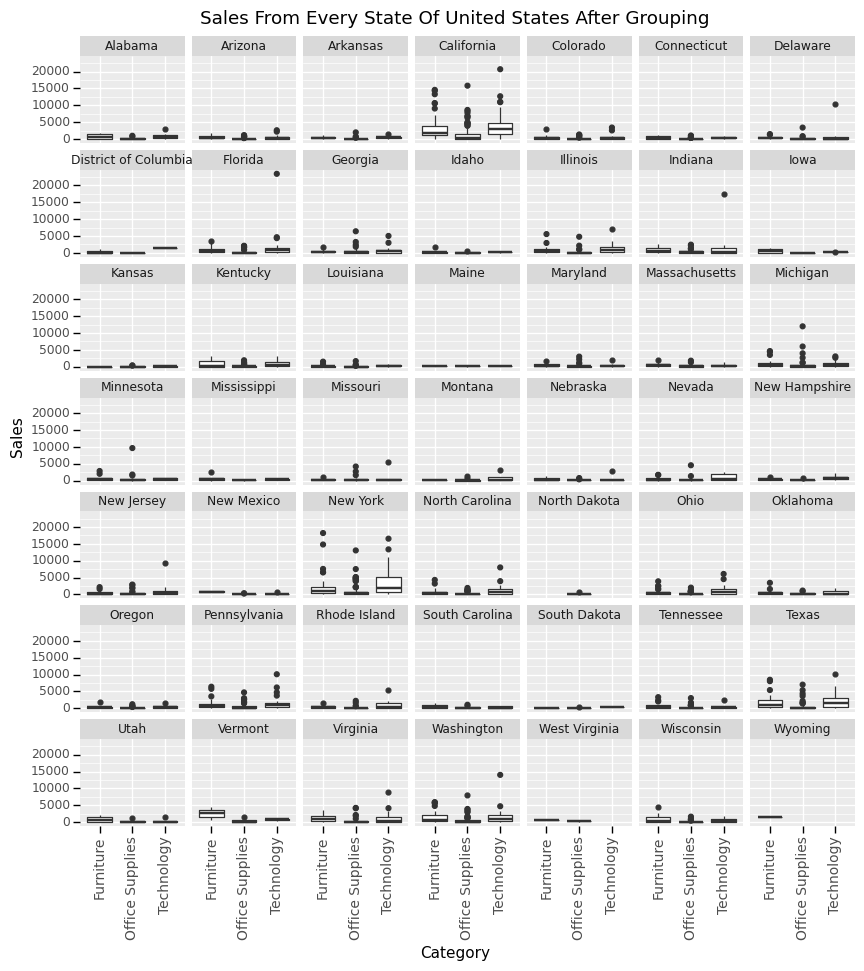

<ggplot: (8764596267641)>

In [36]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Sales')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Sales From Every State Of United States After Grouping"))

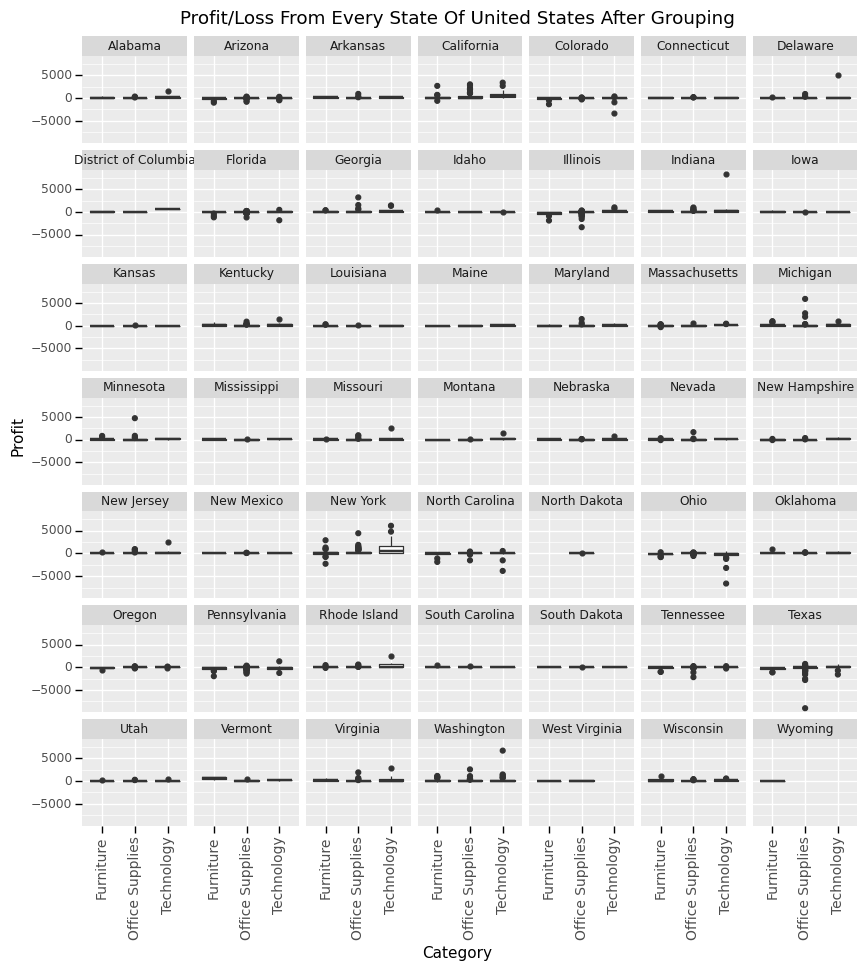

<ggplot: (8764595985098)>

In [37]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Profit')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Profit/Loss From Every State Of United States After Grouping"))

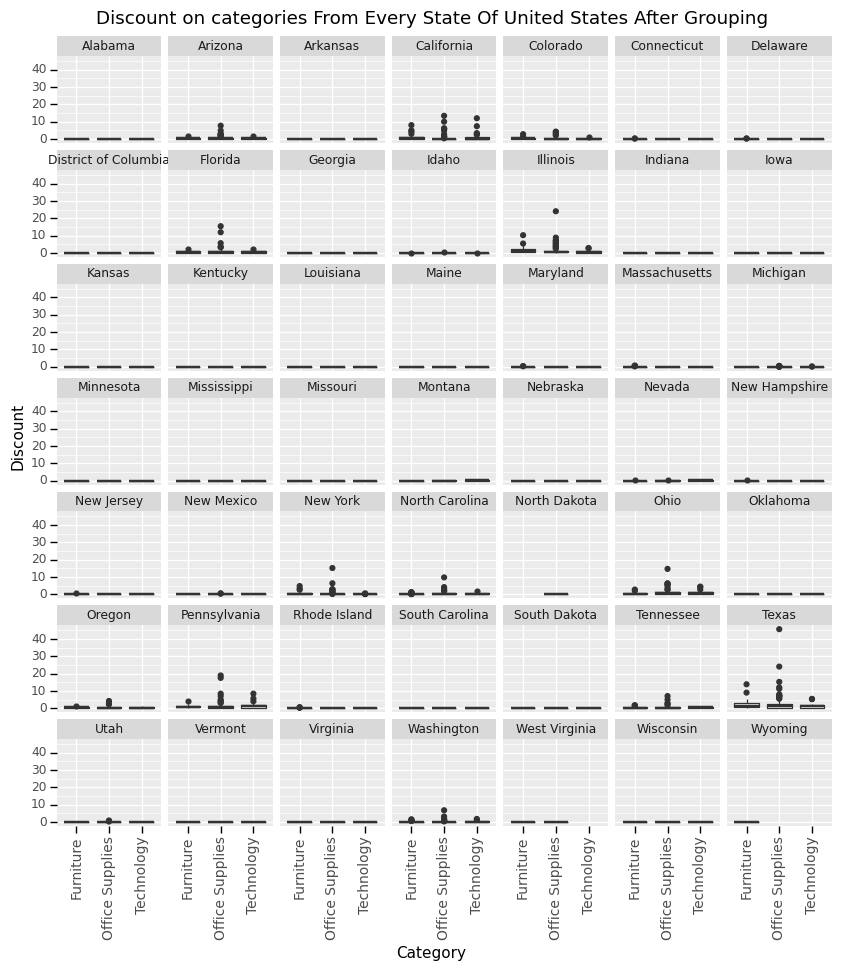

<ggplot: (8764598904573)>

In [38]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=5,axis_ticks_length_minor=5)
(ggplot(grouped, aes(x='Category', y='Discount')) + geom_boxplot() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['State']) + flip_xlabels+ggtitle("Discount on categories From Every State Of United States After Grouping"))

From Above Graph we can see that on an average "Texas","Pennsylvania","NewYork","Ohio","North Carolina","California","Florida","Illionis" these are the states where highest number of Discounts on different Categories has given. And in other states either there were no discounts on category or in very less number of Discounts are given.

### 7. Using K-Mean Clustering Model

In [39]:
from sklearn.cluster import KMeans
x = df.iloc[:,[9,10,11,12]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

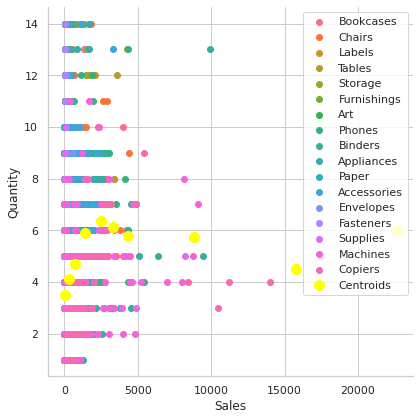

In [40]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

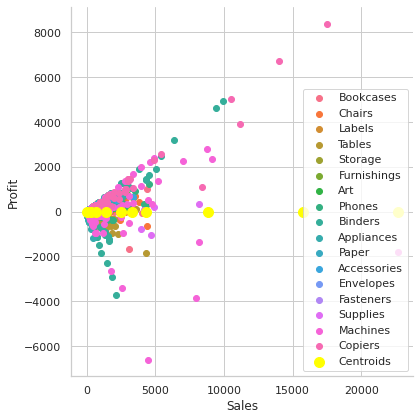

In [41]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Profit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### 8. Interpretation

From the Above data Visualization and Clustering we can see that in Which states and in which Category Sales and profits are High or less,We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.So For Deciding that Range we have to do some Technical Analysis.One can Do it through Factor Analysis,or also can Do it throgh neural networks.

### 9. Conclusion

<b> From All these analysis we finally conclude that,<br>
<br> 1 . If we give more Discount on products our sales goes increses but Profit get down. <br>
<br> 2 . In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount.<br>
<br> 3 . Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.<br>
<br> 4 . Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses.<br>
<br> 5 . We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City<br>
<br> 6 .  To rise the profits , we first need to sell consumer segment products more .<br>
<br> 7 . For enhancing the profits , we need to sell more to the states which are liking our products like New York and California .

